In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\spotify_millsongdata.csv")

In [3]:
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


# Initial Understanding

In [4]:
df.shape

(57650, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
top_artist= df["artist"].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artist)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [8]:
df=df.sample(10000,replace=True)

In [9]:
df=df.drop("link",axis=1).reset_index(drop=True)


In [10]:
df.shape

(10000, 3)

In [11]:
df.head()

,artist,song,text
0,Lou Reed,Endlessly Jealous,"Jealousy, endlessly \r\nSweeps through my min..."
1,Iggy Pop,Mr. Dynamite,They call me Mr. Dynamite \r\nI blow things u...
2,Prince,Don't Play Me,Don't play me \r\nI'm over thirty and I don't...
3,Cher,Dark Lady,"The fortune queen of New Orleans, \r\nWas bru..."
4,J Cole,Cost Me A Lot,[Chorus:] \r\nWhat can I? \r\nIt's cost me a...


In [12]:
#wordcloud for song analysis
all_lyrics=" ".join(df["text"].dropna())
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(all_lyrics)

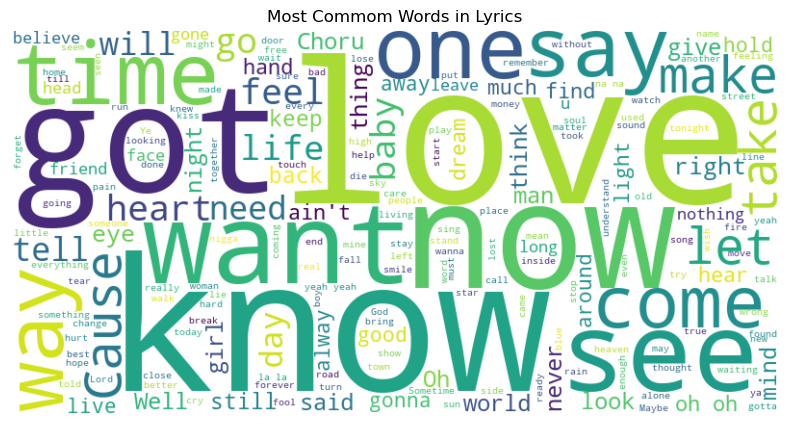

In [13]:
#WordCloud to visualize the most common words in lyrics.
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most Commom Words in Lyrics")
plt.show()

# Data preprocessing

In [14]:
#download nltk data
nltk.download('punkt')
nltk.download('pinkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading pinkt_tab: Package 'pinkt_tab' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words=set(stopwords.words('english'))

In [16]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [17]:
df['cleaned_text']=df['text'].apply(preprocess_text)

In [18]:
df.head()

,artist,song,text,cleaned_text
0,Lou Reed,Endlessly Jealous,"Jealousy, endlessly \r\nSweeps through my min...",jealousy endlessly sweeps mind jealousy often ...
1,Iggy Pop,Mr. Dynamite,They call me Mr. Dynamite \r\nI blow things u...,call mr dynamite blow things black white end c...
2,Prince,Don't Play Me,Don't play me \r\nI'm over thirty and I don't...,dont play im thirty dont smoke weed put ass aw...
3,Cher,Dark Lady,"The fortune queen of New Orleans, \r\nWas bru...",fortune queen new orleans brushing cat black l...
4,J Cole,Cost Me A Lot,[Chorus:] \r\nWhat can I? \r\nIt's cost me a...,chorus cost lot cost lot cost lot cost lot cos...


In [19]:
#Vectorization with TD-IDF
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
tfidf_matrix=tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [20]:
#compute Cosine similarity
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [21]:
cosine_sim

array([[1.00000000e+00, 5.72505617e-03, 1.82263266e-02, ...,
        3.55028583e-03, 3.57597325e-03, 3.05305363e-02],
       [5.72505617e-03, 1.00000000e+00, 1.31709954e-02, ...,
        3.09394135e-02, 5.36007026e-03, 9.38980630e-04],
       [1.82263266e-02, 1.31709954e-02, 1.00000000e+00, ...,
        2.61375809e-02, 2.53554094e-02, 1.54693703e-02],
       ...,
       [3.55028583e-03, 3.09394135e-02, 2.61375809e-02, ...,
        1.00000000e+00, 1.48138566e-02, 3.71546756e-02],
       [3.57597325e-03, 5.36007026e-03, 2.53554094e-02, ...,
        1.48138566e-02, 1.00000000e+00, 0.00000000e+00],
       [3.05305363e-02, 9.38980630e-04, 1.54693703e-02, ...,
        3.71546756e-02, 0.00000000e+00, 1.00000000e+00]])

In [22]:
# Recommendation  Function
def recommend_songs(song_name,cosine_sim,df=df,top_n=5):
    idx=df[df['song'].str.lower()==song_name.lower()].index
    if len(idx)==0:
        return "Song not found in the dataset!"
    
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x: x[1],reverse=True)
    sim_scores=sim_scores[1:top_n+1]
    
    song_indices=[i[0]for i in sim_scores]
    
    return df[['artist','song']].iloc[song_indices]

In [23]:
df["song"][4]

'Cost Me A Lot'

In [30]:
import pickle

with open("songs_df.pkl","wb") as f:
    pickle.dump(df,f)
    
    
with open("tfidf_vectorizer.pkl","wb")as f:
    pickle.dump(tfidf_vectorizer,f)
    
with open("cosine_sim.pkl","wb") as f:
    pickle.dump(cosine_sim,f)
    
print("Files saved successfully")    

Files saved successfully
